In [158]:
# Instalar de forma aparte del requirements.txt por fallas en algunas versiones de pip


In [159]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [160]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [161]:
pip install tqdm

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [162]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# 1. Importe librerias y csv

In [163]:
# Importar librerias
import os
import requests
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import requests
import missingno as msno
from sklearn.model_selection import train_test_split
import shap
from missforest import MissForest
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from xgboost import XGBRegressor
import lightgbm as lgb
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

## Visualizar csv

In [164]:
df = pd.read_csv("/workspaces/steven10015-intro-ml/data/raw/airbnb.csv")
# Fijar el id como indice
df.rename(columns={"availability_365": "days_available", "calculated_host_listings_count": "lodging"}, inplace=True) # Renombrar columnas para mejor entendimiento (Compatible con compañeros)
df.set_index('id', inplace=True)
pd.set_option('display.max_columns', None)
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,lodging,days_available
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [165]:
# Visualizar tamaño previo a la limpieza 
df.shape

(48895, 15)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 48879 non-null  object 
 1   host_id              48895 non-null  int64  
 2   host_name            48874 non-null  object 
 3   neighbourhood_group  48895 non-null  object 
 4   neighbourhood        48895 non-null  object 
 5   latitude             48895 non-null  float64
 6   longitude            48895 non-null  float64
 7   room_type            48895 non-null  object 
 8   price                48895 non-null  int64  
 9   minimum_nights       48895 non-null  int64  
 10  number_of_reviews    48895 non-null  int64  
 11  last_review          38843 non-null  object 
 12  reviews_per_month    38843 non-null  float64
 13  lodging              48895 non-null  int64  
 14  days_available       48895 non-null  int64  
dtypes: float64(3), int64(6), object(6)


# 2. Limpieza del csv

## 2.1 Valores Únicos

In [167]:
# Visualizar si hay columnas con un valor unico multiplicado
unicos = df.nunique()
df[unicos[unicos==1].index]
# df.drop(unicos[unicos==1].index, axis=1, inplace=True), se omite, al no haber columnas de esas características.

""
id
2539
2595
3647
3831
5022
...
36484665
36485057
36485431


## 2.2 Observar filas duplicadas, identicas

In [168]:
#Indice
dup_fil=df.duplicated().sum()
print("No hay filas duplicadas" if dup_fil==0 else "Hay filas duplicadas")

No hay filas duplicadas


In [169]:
# Aqui con T invertimos el dataframe, para ver columnas duplicadas
dup_col=df.T.duplicated(keep=False).sum()
print("No hay variables exactamente iguales" if dup_col==0 else "Hay variables exactamente iguales")

No hay variables exactamente iguales


## 2.3 Columnas redundantes

En algunas ocasiones habrán grupos de columnas muy específicas, las cuales podemos borrar ya que se pueden deducir sus datos a partir de las otras. Ejemplo: Casa_este, Casas_oeste, Casas_norte, Casas_sur; puedes borrar alguna sin problema y así reducir el peso del dataset.

In [170]:
# En la segunda linea de código se ve si se cumple la condición de que un host id tenga mas de un host name.
host_name_por_id = df.groupby('host_id')['host_name'].nunique()
print("host_id con >1 host_name:", (host_name_por_id > 1).sum())

host_id con >1 host_name: 0


[]

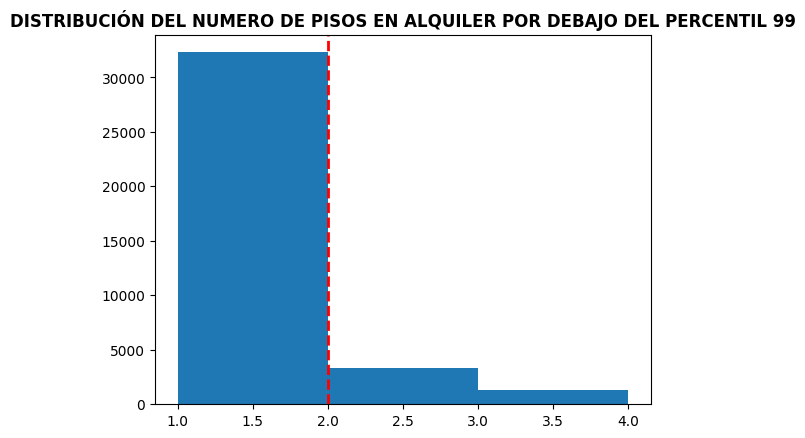

In [171]:
pisos=df["host_id"].value_counts() # Se cuenta el nº de anuncios por host_id
plt.hist(pisos[pisos<pisos.quantile(0.99)].astype("int"), bins="auto") #Nº de anuncios por debajo del percentil
plt.axvline(2, color='red', linestyle='--', linewidth=2)
plt.title("Distribución del numero de pisos en alquiler por debajo del percentil 99".upper(), fontweight="bold")
plt.plot()

A partir del gráfico se tomó la decisión de usar el número 2 para saber si un host era o no profesional.

In [172]:
df.drop(columns=["host_name"], inplace = True) # Se elimina la columna host_name

In [173]:
name_por_id = df.groupby('id')['name'].nunique()
print("id con >1 name:", (name_por_id > 1).sum())

id con >1 name: 0


In [174]:
df.drop(columns=['name'], inplace=True) # Se elimina la columna name

Vemos el df con columnas de host_name y name elimandas

In [175]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,lodging,days_available
id,,,,,,,,,,,,,
2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## 2.4 Columnas data leakeage

Se considera data leakeage cuando una variable que tenemos presente (en forma de columna) es nuestro objetivo de investigación o consideramos que pueda interferir con este. Por ejemplo, el precio por metro cuadrado de una vivienda, si nuestro objetivo es predecir los precios.

## 2.5 Introducción de columna útil para el estudio

In [176]:
# Paso útil para entender que la columna lodging es el número de anuncios por host_id
df['host_id'].value_counts()# Cantidad de filas con un mismo host_id

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
32045          1
7355           1
45445          1
24680832       1
274035866      1
Name: count, Length: 37457, dtype: int64

In [177]:
# lo que va antes de map es reemplazado por lo que va despues.
df['host_prof'] = df['host_id'].map(df['host_id'].value_counts()).apply(lambda x: 1 if x >= 2 else 0)
# Guardar la columna
col = df.pop('host_prof')

# Insertarla en la posición 1 (justo después de host_id)
df.insert(1, 'host_prof', col)

df.head()

,host_id,host_prof,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,lodging,days_available
id,,,,,,,,,,,,,,
2539,2787,1,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,2845,1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,4632,0,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,4869,0,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,7192,0,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## 2.6 Visualizar columnas con datos faltantes

In [178]:
# Columnas columnas con más de un 15% de valores faltantes
missing=df.isna().mean()*100
missing[missing>15]
# missing[missing>15] esta parte del código genera booleanos, es una condición.

last_review          20.558339
reviews_per_month    20.558339
dtype: float64

No se observan una gran cantidad de datos faltantes, menor al 25% se puede considerar aceptable.

## 2.7 Visualizar cuantas filas tienen datos faltantes

In [179]:
fila_datos_faltantes = df.isna().any(axis=1).sum() # any sirve para ver CUALQUIER dato faltante
fila_datos_faltantes[fila_datos_faltantes>0] # primer tipo de código para ver estas condiciones

array([10052])

In [180]:
n = 2 # segundo tipo de código, se probaron varios números, 2 fue el primero con na
df[df.isna().sum(axis=1) > n] # se los visualiza, su sintaxis es seleccionar valores/dividirlos por col.fila/condición para mostrarlos.

,host_id,host_prof,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,lodging,days_available
id,,,,,,,,,,,,,,


In [181]:
df_2na = df[df.isna().sum(axis=1) > n] # se guarda para ver tamaño
df_2na.shape

(0, 14)

Las unicas dos variables con valores faltantes son last_review y reviews_per_month. Vamos a analizar si hay algún patron común.

In [182]:
df[["number_of_reviews","last_review","reviews_per_month"]][df["last_review"].isna()]

,number_of_reviews,last_review,reviews_per_month
id,,,
3647,0,NaN,NaN
7750,0,NaN,NaN
8700,0,NaN,NaN
11452,0,NaN,NaN
11943,0,NaN,NaN
...,...,...,...
36484665,0,NaN,NaN
36485057,0,NaN,NaN
36485431,0,NaN,NaN


No son datos que falten al azar, tiene una lógica detrás.

<Axes: >

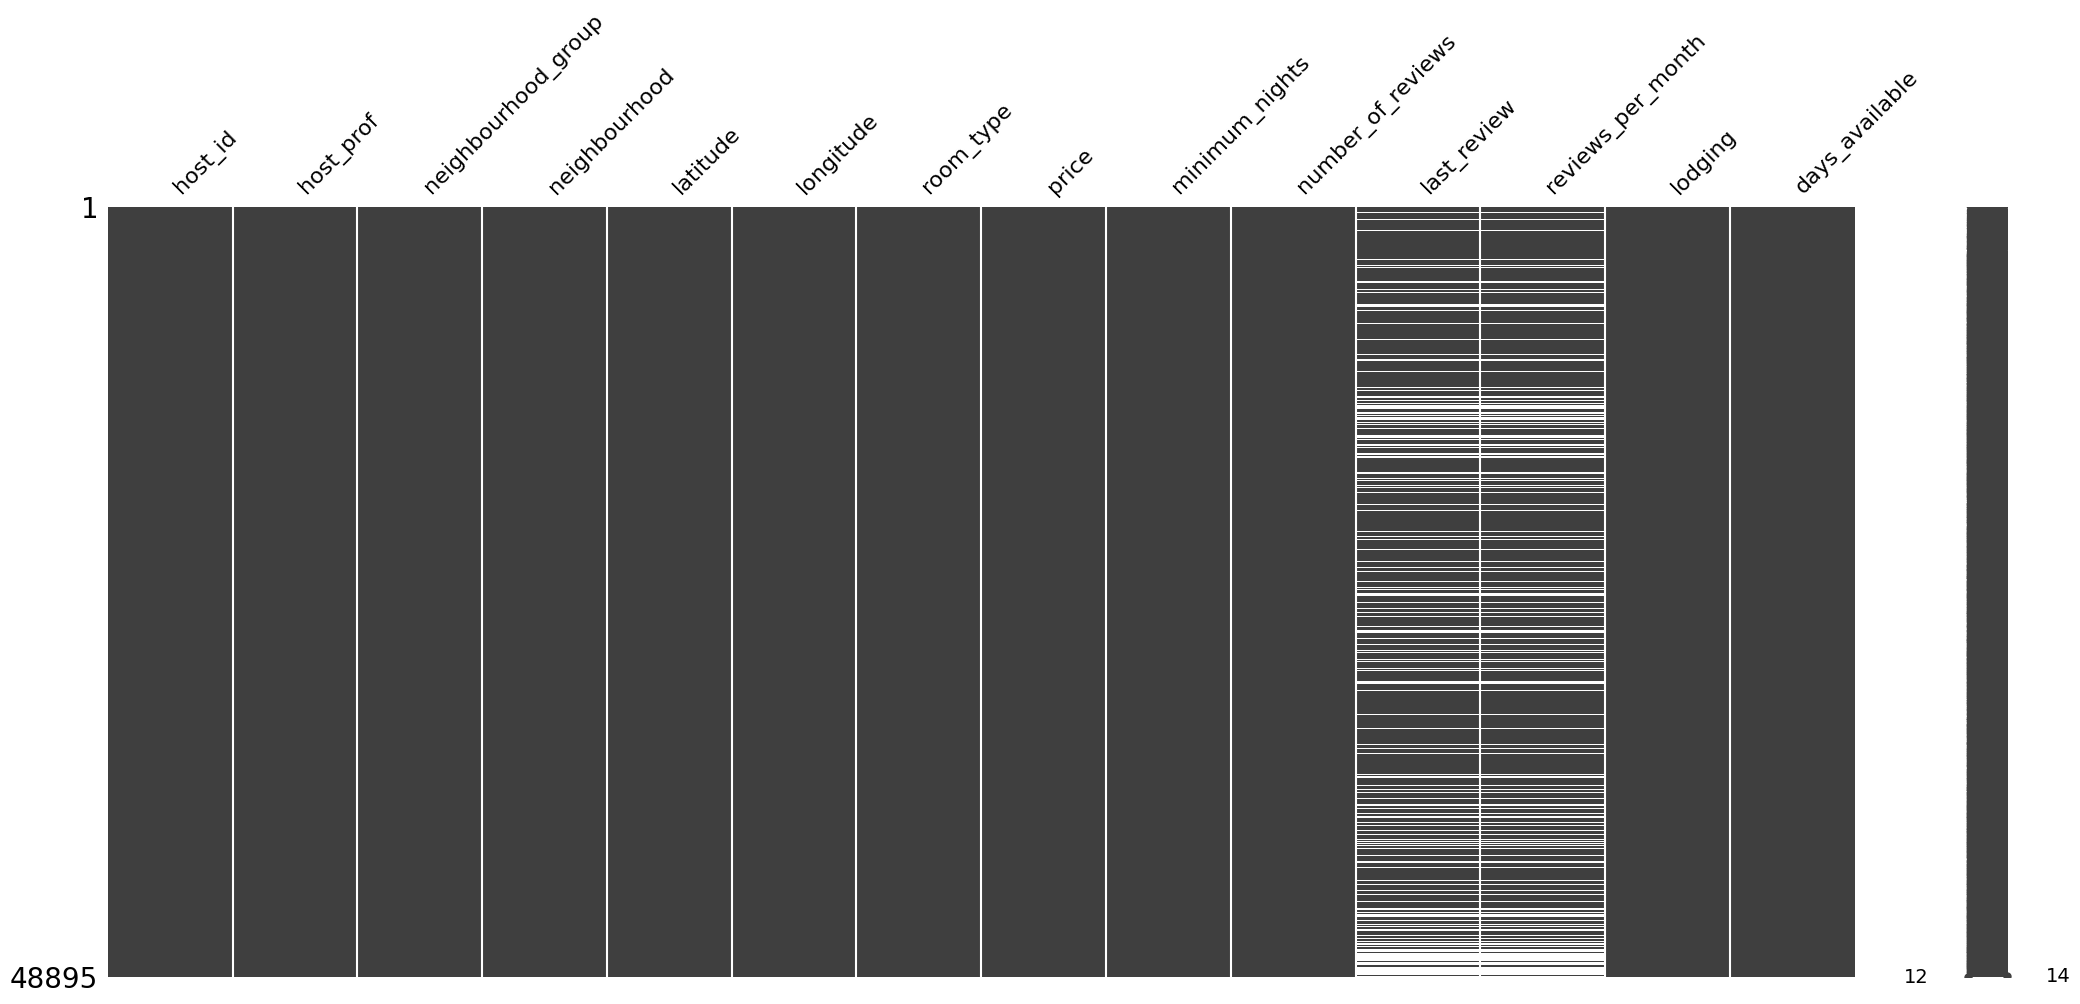

In [183]:
# Visualizamos los valores faltantes como una matriz
msno.matrix(df)

## 2.8 Limpieza de columnas pendientes

In [184]:
# Pasamos la columna a datetime para poder trabajar con ella 
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce') #errors --> maneja valores no YY/MM/dd
# Creamos la fecha de la utima reseña posible
## Establecemos como ultima fecha 2 dias de margen sobre la fecha mas cercana
today = df['last_review'].sort_values(ascending=False).iloc[0]+ pd.Timedelta(days=2)
df['days_since_review'] = (today - df['last_review']).dt.days
#Eliminamos la columna fecha
df.drop(columns=["last_review"], axis=1, inplace=True)
df.head()

,host_id,host_prof,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,lodging,days_available,days_since_review
id,,,,,,,,,,,,,,
2539,2787,1,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,264.0
2595,2845,1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,50.0
3647,4632,0,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,NaN
3831,4869,0,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,5.0
5022,7192,0,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,233.0


In [185]:
#Reseñas al mes iguales a 0
df['reviews_per_month'] = pd.to_numeric(df['reviews_per_month'], errors='coerce')
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df[df['reviews_per_month'].isna()]

,host_id,host_prof,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,lodging,days_available,days_since_review
id,,,,,,,,,,,,,,


## 2.9 Agrupar variables

### Apartado de test estadístico para poder visualizar si existen diferencias signifivativos previo agrupamiento.

In [186]:
df["neighbourhood_group"].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [187]:
prec_barr={}

for barr in df["neighbourhood_group"].unique():
    prec_barr[barr]=df["price"][df["neighbourhood_group"]==barr].to_list()

<Axes: ylabel='Count'>

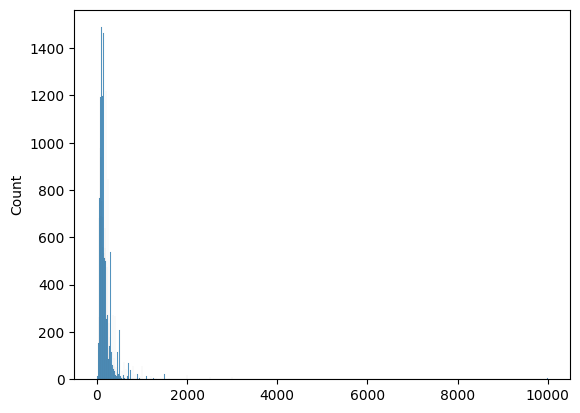

In [188]:
sns.histplot(prec_barr["Manhattan"])

In [189]:
# VERIFICAR NORMALIDAD PARA CADA GRUPO CON KOLMOGOROV-SMIRNOV
print("=== TEST DE NORMALIDAD: KOLMOGOROV-SMIRNOV ===\n")

for barrio, precios in prec_barr.items():
    # Calcular media y desviación estándar del grupo
    media = np.mean(precios)
    desv_std = np.std(precios)
    
    # Realizar el test de Kolmogorov-Smirnov
    estadistico, p_valor = stats.kstest(precios, 'norm', args=(media, desv_std))
    
    print(f"\n{barrio}:")
    print(f"  • Tamaño muestra: {len(precios)}")
    print(f"  • Estadístico K-S: {estadistico:.4f}")
    print(f"  • P-valor: {p_valor:.4f}")
    
    # Interpretación
    if p_valor < 0.05:
        print(f"  ⚠️ NO sigue distribución normal (p < 0.05)")
    else:
        print(f"  ✓ Puede considerarse normal (p >= 0.05)")

print("\n" + "="*50)
print("CONCLUSIÓN:")
print("Si p-valor < 0.05 → Los datos NO son normales")
print("Si p-valor >= 0.05 → Los datos SÍ son normales")

=== TEST DE NORMALIDAD: KOLMOGOROV-SMIRNOV ===


Brooklyn:
  • Tamaño muestra: 20104
  • Estadístico K-S: 0.2963
  • P-valor: 0.0000
  ⚠️ NO sigue distribución normal (p < 0.05)

Manhattan:
  • Tamaño muestra: 21661
  • Estadístico K-S: 0.2841
  • P-valor: 0.0000
  ⚠️ NO sigue distribución normal (p < 0.05)

Queens:
  • Tamaño muestra: 5666
  • Estadístico K-S: 0.3242
  • P-valor: 0.0000
  ⚠️ NO sigue distribución normal (p < 0.05)

Staten Island:
  • Tamaño muestra: 373
  • Estadístico K-S: 0.3635
  • P-valor: 0.0000
  ⚠️ NO sigue distribución normal (p < 0.05)

Bronx:
  • Tamaño muestra: 1091
  • Estadístico K-S: 0.2661
  • P-valor: 0.0000
  ⚠️ NO sigue distribución normal (p < 0.05)

CONCLUSIÓN:
Si p-valor < 0.05 → Los datos NO son normales
Si p-valor >= 0.05 → Los datos SÍ son normales


### Grupo de barrios

In [190]:
# Se saca las medias para establecer un orden.
df.groupby("neighbourhood_group")["price"].mean().sort_values().reset_index()

,neighbourhood_group,price
0,Bronx,87.496792
1,Queens,99.517649
2,Staten Island,114.812332
3,Brooklyn,124.383207
4,Manhattan,196.875814


In [191]:
#Creamos un df ordenando lor barrios por su precio medio
orden1=df.groupby("neighbourhood_group")["price"].mean().sort_values().reset_index()#Pasamos la serie a df
#Creamos un ranking de menor a mayor precio
orden1["cat"]=orden1["price"].rank().astype(int)
#Eliminamos el precio del nuevo df y establecemos indice para crear el diccionario objetivo
dicc1=orden1.drop(columns=["price"]).set_index("neighbourhood_group").to_dict()["cat"]
dicc1

{'Bronx': 1, 'Queens': 2, 'Staten Island': 3, 'Brooklyn': 4, 'Manhattan': 5}

In [192]:
#Sutituimos los valores en el df
df["neighbourhood_group"]=df["neighbourhood_group"].replace(dicc1).astype("category")
df.head(2)

/tmp/ipykernel_1778/2812608512.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["neighbourhood_group"]=df["neighbourhood_group"].replace(dicc1).astype("category")


,host_id,host_prof,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,lodging,days_available,days_since_review
id,,,,,,,,,,,,,,
2539,2787,1,4,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,264.0
2595,2845,1,5,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,50.0


### Agrupar por barrios

In [193]:
df.groupby("neighbourhood")["price"].mean().sort_values().reset_index()

,neighbourhood,price
0,Bull's Head,47.333333
1,Hunts Point,50.500000
2,Tremont,51.545455
3,Soundview,53.466667
4,New Dorp,57.000000
...,...,...
216,Riverdale,442.090909
217,Sea Gate,487.857143
218,Tribeca,490.638418
219,Woodrow,700.000000


In [194]:
#Creamos un df ordenando los barrios por su precio medio
orden2=df.groupby("neighbourhood")["price"].mean().sort_values().reset_index()
#Creamos un ranking de menor a mayor precio
orden2["cat"]=orden2["price"].rank().astype(int)
dicc2=orden2.drop(columns=["price"]).set_index("neighbourhood").to_dict()["cat"]
dicc2

{"Bull's Head": 1,
 'Hunts Point': 2,
 'Tremont': 3,
 'Soundview': 4,
 'New Dorp': 5,
 'Bronxdale': 6,
 'New Dorp Beach': 7,
 'Grant City': 8,
 'Concord': 9,
 'Mount Eden': 10,
 'Corona': 11,
 'Woodlawn': 12,
 'Castle Hill': 13,
 'Borough Park': 14,
 'Olinville': 15,
 'Woodhaven': 16,
 'Arden Heights': 17,
 'Emerson Hill': 18,
 'Graniteville': 19,
 'Parkchester': 20,
 'Schuylerville': 21,
 'Morris Park': 22,
 'Fordham': 23,
 'University Heights': 24,
 'Silver Lake': 25,
 'Highbridge': 26,
 'Westerleigh': 27,
 'Concourse Village': 28,
 'Rossville': 29,
 'Fieldston': 30,
 'Little Neck': 31,
 'Baychester': 32,
 'Norwood': 33,
 'Bensonhurst': 34,
 'New Springville': 35,
 'Tompkinsville': 36,
 'Brownsville': 37,
 'Rosedale': 38,
 'Morris Heights': 39,
 'Belmont': 40,
 'Ridgewood': 41,
 'Co-op City': 42,
 'Mount Hope': 42,
 'Kingsbridge': 44,
 'Richmondtown': 45,
 'Gravesend': 46,
 'Dongan Hills': 47,
 'Port Morris': 48,
 'North Riverdale': 49,
 'Midwood': 50,
 'Elmhurst': 51,
 'West Brighto

In [195]:
#Sutituimos los valores en el df
df["neighbourhood"]=df["neighbourhood"].replace(dicc2).astype("category")
df.head(2)

/tmp/ipykernel_1778/1461765114.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["neighbourhood"]=df["neighbourhood"].replace(dicc2).astype("category")


,host_id,host_prof,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,lodging,days_available,days_since_review
id,,,,,,,,,,,,,,
2539,2787,1,4,93,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,264.0
2595,2845,1,5,210,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,50.0


### Tipo de habitacion

In [196]:
df.groupby("room_type")["price"].mean().sort_values().reset_index()

,room_type,price
0,Shared room,70.127586
1,Private room,89.780973
2,Entire home/apt,211.794246


In [ ]:
## Haz un bocplo similar al anterior para room_type

In [197]:
#Creamos un df ordenando los barrios por su precio medio
orden3=df.groupby("room_type")["price"].mean().sort_values().reset_index()
#Creamos un ranking de menor a mayor precio
orden3["cat"]=orden3["price"].rank().astype(int)
dicc3=orden3.drop(columns=["price"]).set_index("room_type").to_dict()["cat"]
dicc3

{'Shared room': 1, 'Private room': 2, 'Entire home/apt': 3}

In [198]:
#Sutituimos los valores en el df
df["room_type"]=df["room_type"].replace(dicc3).astype("category")
df.head(2)

/tmp/ipykernel_1778/3597542359.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["room_type"]=df["room_type"].replace(dicc3).astype("category")


,host_id,host_prof,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,lodging,days_available,days_since_review
id,,,,,,,,,,,,,,
2539,2787,1,4,93,40.64749,-73.97237,2,149,1,9,0.21,6,365,264.0
2595,2845,1,5,210,40.75362,-73.98377,3,225,1,45,0.38,2,355,50.0


##  3. Test de entrenamiento, división de datos

In [199]:
X = df.drop('price',axis=1) #Separamos la variable objetivo/dependiente/explicada (y) de las independientes/explicativas (X)
y = df['price']

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Se usa semilla para tener el mismo resultado aleatorio cada vez.

In [201]:
X_train.head()

,host_id,host_prof,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,lodging,days_available,days_since_review
id,,,,,,,,,,,,,
25674366,9038810,0,4,158,40.71577,-73.95530,3,3,11,0.87,1,1,55.0
19100971,81745867,0,5,86,40.84917,-73.94048,2,2,2,0.16,1,0,380.0
24209867,1218837,1,4,121,40.68993,-73.95947,2,2,0,0.00,2,0,NaN
22451798,4126686,0,4,121,40.68427,-73.93118,3,3,87,4.91,1,267,5.0
5344850,27698133,0,2,70,40.74705,-73.89564,2,5,13,0.25,1,0,204.0


## Imputación Missing Values

In [202]:
df[["days_since_review", "host_prof", "latitude", "longitude", "price", "minimum_nights", "number_of_reviews"]].corr()["days_since_review"]

days_since_review    1.000000
host_prof           -0.203453
latitude             0.021828
longitude           -0.105687
price                0.016811
minimum_nights       0.052803
number_of_reviews   -0.283000
Name: days_since_review, dtype: float64

In [203]:
'''impute_knn=KNNImputer(n_neighbors=2)
df_imp=impute_knn.fit_transform(df[["host_prof", "number_of_reviews", "days_since_review"]]) #seleccionamos las dos variables más correlacionadas

df_imp=pd.DataFrame(df_imp, columns=["host_prof", "number_of_reviews", "days_since_review"])

df_imp["days_since_review"].isnull().sum() '''

'impute_knn=KNNImputer(n_neighbors=2)\ndf_imp=impute_knn.fit_transform(df[["host_prof", "number_of_reviews", "days_since_review"]]) #seleccionamos las dos variables más correlacionadas\n\ndf_imp=pd.DataFrame(df_imp, columns=["host_prof", "number_of_reviews", "days_since_review"])\n\ndf_imp["days_since_review"].isnull().sum() '

In [204]:
# df[df["last_review"].isna()].head(2)

## Outliers

In [205]:
columns=["lodging", "host_prof", "neighbourhood_group", "neighbourhood", "latitude", "longitude", "room_type", "minimum_nights", "number_of_reviews", "reviews_per_month", "days_since_review", "days_available"]
X_train[columns].describe().T

,count,mean,std,min,25%,50%,75%,max
lodging,39116.0,7.188925,33.172629,1.00000,1.000000,1.000000,2.000000,327.00000
host_prof,39116.0,0.339554,0.473564,0.00000,0.000000,0.000000,1.000000,1.00000
latitude,39116.0,40.728927,0.054555,40.49979,40.690067,40.723035,40.763180,40.91306
longitude,39116.0,-73.952311,0.046029,-74.24285,-73.983080,-73.955750,-73.936498,-73.71299
minimum_nights,39116.0,7.144775,21.472973,1.00000,1.000000,3.000000,5.000000,1250.00000
number_of_reviews,39116.0,23.334978,44.499352,0.00000,1.000000,5.000000,24.000000,629.00000
reviews_per_month,39116.0,1.094376,1.604249,0.00000,0.040000,0.370000,1.590000,58.50000
days_since_review,31010.0,277.330087,413.495354,2.00000,17.000000,51.000000,360.000000,2998.00000
days_available,39116.0,113.445368,131.846430,0.00000,0.000000,46.000000,229.000000,365.00000


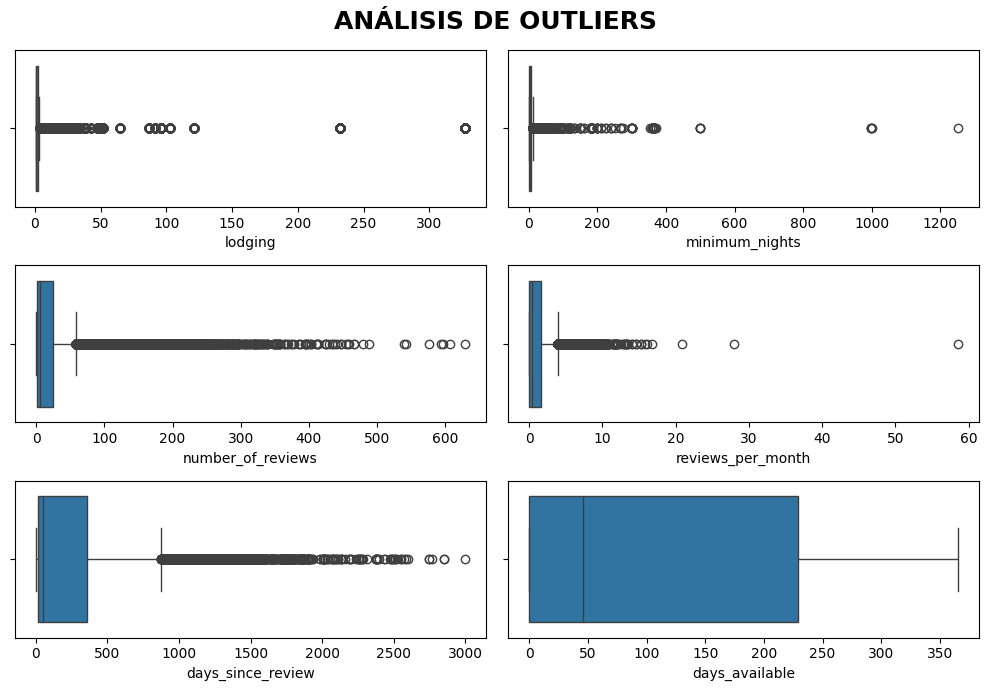

In [206]:
fig, axis = plt.subplots(3, 2, figsize = (10, 7))

# Crear una figura múltiple con histogramas y diagramas de caja
sns.boxplot(ax = axis[0, 0], data = X_train, x = "lodging")
sns.boxplot(ax = axis[0, 1],data = X_train, x = "minimum_nights")
sns.boxplot(ax = axis[1, 0],data = X_train, x = "number_of_reviews")
sns.boxplot(ax = axis[1, 1],data = X_train, x = "reviews_per_month")
sns.boxplot(ax = axis[2, 0],data = X_train, x = "days_since_review")
sns.boxplot(ax = axis[2, 1],data = X_train, x = "days_available")
fig.suptitle("Análisis de Outliers".upper(), size=18, fontweight="bold")
# Ajustar el layout
plt.tight_layout()
# Mostrar el plot
plt.show()

In [207]:
iso = IsolationForest(random_state=123)
df_num = X_train.copy()
df_num['outlier_flag'] = iso.fit_predict(X_train)

In [208]:
df_num['outlier_flag'].value_counts(normalize=True)*100

outlier_flag
 1    84.108805
-1    15.891195
Name: proportion, dtype: float64

In [209]:
df_num[df_num['outlier_flag']==1].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
host_id,32900.0,57691199.30,71397696.57,2438.00,6842719.00,25103129.50,79521854.00,2.743213e+08
host_prof,32900.0,0.27,0.45,0.00,0.00,0.00,1.00,1.000000e+00
latitude,32900.0,40.73,0.05,40.57,40.69,40.72,40.76,4.088000e+01
longitude,32900.0,-73.96,0.03,-74.09,-73.98,-73.96,-73.94,-7.371000e+01
minimum_nights,32900.0,5.35,8.49,1.00,2.00,3.00,5.00,1.800000e+02
number_of_reviews,32900.0,19.72,34.90,0.00,1.00,5.00,21.00,3.200000e+02
reviews_per_month,32900.0,0.92,1.28,0.00,0.04,0.32,1.29,1.313000e+01
lodging,32900.0,2.40,6.89,1.00,1.00,1.00,2.00,1.210000e+02
days_available,32900.0,94.11,123.15,0.00,0.00,19.00,178.00,3.650000e+02
days_since_review,26288.0,306.25,428.81,2.00,18.00,66.00,444.00,2.998000e+03


In [210]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_num[df_num['outlier_flag']==-1].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
host_id,6216.00,120004687.20,93281330.06,2787.00,23488445.25,114652581.50,215588687.00,274225617.00
host_prof,6216.00,0.69,0.46,0.00,0.00,1.00,1.00,1.00
latitude,6216.00,40.74,0.07,40.50,40.69,40.74,40.77,40.91
longitude,6216.00,-73.92,0.08,-74.24,-73.98,-73.93,-73.87,-73.72
minimum_nights,6216.00,16.63,49.12,1.00,1.00,2.00,30.00,1250.00
number_of_reviews,6216.00,42.47,74.70,0.00,1.00,8.00,50.00,629.00
reviews_per_month,6216.00,2.04,2.54,0.00,0.04,1.00,3.34,58.50
lodging,6216.00,32.51,76.89,1.00,1.00,3.00,9.00,327.00
days_available,6216.00,215.79,129.14,0.00,89.00,249.50,338.00,365.00
days_since_review,4722.00,116.34,261.92,2.00,10.00,21.50,66.00,2501.00


# 2. SELECCIÓN DE CARCATERÍSTICAS

## 2.1. Aplicación de los métodos


### A) Feature importance con Random Forest

In [211]:
# Entrenamiento de RF
model = RandomForestRegressor(random_state=42,n_jobs=-1).fit(X_train, y_train)

In [212]:
# Importancia de características
importances = model.feature_importances_*100

# Convertir a DataFrame
df_rf = pd.DataFrame({'feature': X_train.columns,'rf_importance': importances}).sort_values(by='rf_importance', ascending=False)

# Calculamos la importancia acumulada
df_rf['rf_importance_acum'] = df_rf['rf_importance'].cumsum()
df_rf

,feature,rf_importance,rf_importance_acum
0,host_id,18.44,18.44
5,longitude,13.21,31.65
4,latitude,13.08,44.73
12,days_since_review,12.22,56.95
11,days_available,8.87,65.82
3,neighbourhood,8.44,74.26
7,minimum_nights,7.88,82.15
6,room_type,6.18,88.33
10,lodging,4.83,93.16
9,reviews_per_month,2.92,96.08


### B) Permutation/Shuffle importance con XGBRegressor

In [213]:
'''X_train[["neighbourhood_group", "neighbourhood", "room_type"]]=X_train[["neighbourhood_group", "neighbourhood", "room_type"]].astype("category") esto ultimo se borra

# Para esta técnica y la de shap se necesita conjunto de validación
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Ajustamos el modelo
model_xgb = XGBRegressor(objective='reg:squarederror',enable_categorical=True ,random_state=42).fit(X_train1, y_train1)'''

'X_train[["neighbourhood_group", "neighbourhood", "room_type"]]=X_train[["neighbourhood_group", "neighbourhood", "room_type"]].astype("category") esto ultimo se borra\n\n# Para esta técnica y la de shap se necesita conjunto de validación\nX_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)\n\n# Ajustamos el modelo\nmodel_xgb = XGBRegressor(objective=\'reg:squarederror\',enable_categorical=True ,random_state=42).fit(X_train1, y_train1)'

In [214]:
#Carm
X_train[["neighbourhood_group", "neighbourhood", "room_type"]]=X_train[["neighbourhood_group", "neighbourhood", "room_type"]].astype("int")

In [215]:
# Para esta técnica y la de shap se necesita conjunto de validación
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Ajustamos el modelo
model_xgb = XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train1, y_train1)

In [216]:
# Realizamos 10 permutaciones por cada característica
perm = permutation_importance(model_xgb, X_val, y_val, n_repeats=10, random_state=42, n_jobs=-1, scoring='neg_mean_absolute_percentage_error')
df_perm = pd.DataFrame({'feature': X_train.columns, 'perm': perm.importances_mean*100}).sort_values('perm', ascending=False)
df_perm

,feature,perm
12,days_since_review,39.04
6,room_type,36.66
3,neighbourhood,33.59
9,reviews_per_month,33.30
5,longitude,14.32
11,days_available,13.76
4,latitude,11.50
0,host_id,11.31
7,minimum_nights,10.92
10,lodging,8.43


### C) SHAP

In [217]:
# Ajustamos el modelo
model_lgbm = lgb.LGBMRegressor(random_state=42, n_jobs=-1).fit(X_train1, y_train1)

explainer = shap.TreeExplainer(model_lgbm, feature_perturbation="tree_path_dependent")
shap_vals = explainer.shap_values(X_val, check_additivity=False)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003281 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2094
[LightGBM] [Info] Number of data points in the train set: 31292, number of used features: 13
[LightGBM] [Info] Start training from score 153.698581


In [218]:
imp_shap = np.abs(shap_vals).mean(axis=0)
imp_shap_pct = imp_shap/imp_shap.sum()*100
df_shap = pd.DataFrame({"feature": X_val.columns, "shap": imp_shap_pct}).sort_values('shap', ascending=False)
df_shap

,feature,shap
6,room_type,29.81
3,neighbourhood,17.82
11,days_available,13.84
12,days_since_review,10.30
7,minimum_nights,7.63
5,longitude,4.24
8,number_of_reviews,4.19
4,latitude,2.97
9,reviews_per_month,2.93
0,host_id,2.92


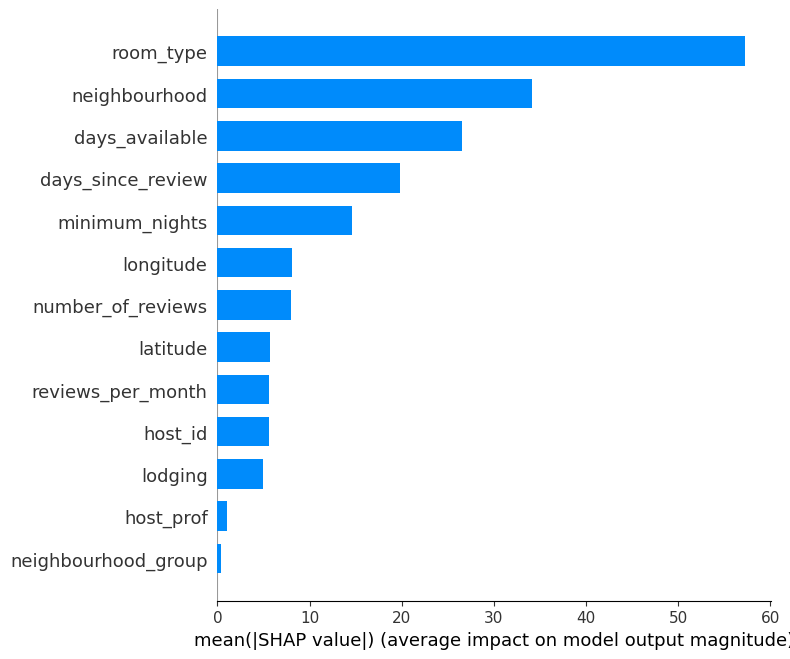

In [219]:
# Resumen gráfico de barras
shap.summary_plot(shap_vals, X_val, plot_type="bar")

## 2.2. Selección de característica según los 3 métodos

In [220]:
df_importances = (
    df_rf
    .merge(df_perm, on='feature', how='outer')
    .merge(df_shap, on='feature', how='outer')
).sort_values('rf_importance', ascending=False)
df_importances

,feature,rf_importance,rf_importance_acum,perm,shap
2,host_id,18.44,18.44,11.31,2.92
6,longitude,13.21,31.65,14.32,4.24
4,latitude,13.08,44.73,11.50,2.97
1,days_since_review,12.22,56.95,39.04,10.30
0,days_available,8.87,65.82,13.76,13.84
8,neighbourhood,8.44,74.26,33.59,17.82
7,minimum_nights,7.88,82.15,10.92,7.63
12,room_type,6.18,88.33,36.66,29.81
5,lodging,4.83,93.16,8.43,2.60
11,reviews_per_month,2.92,96.08,33.30,2.93


In [221]:
#Filtrado
df_filt = df_importances[(df_importances['rf_importance']>=1)&(df_importances['perm']>=1)&(df_importances['shap']>=1)]
df_filt

,feature,rf_importance,rf_importance_acum,perm,shap
2,host_id,18.44,18.44,11.31,2.92
6,longitude,13.21,31.65,14.32,4.24
4,latitude,13.08,44.73,11.50,2.97
1,days_since_review,12.22,56.95,39.04,10.30
0,days_available,8.87,65.82,13.76,13.84
8,neighbourhood,8.44,74.26,33.59,17.82
7,minimum_nights,7.88,82.15,10.92,7.63
12,room_type,6.18,88.33,36.66,29.81
5,lodging,4.83,93.16,8.43,2.60
11,reviews_per_month,2.92,96.08,33.30,2.93


## 2.3. Comprobación vif y correlaciones

In [222]:
features = df_filt['feature']
features

2               host_id
6             longitude
4              latitude
1     days_since_review
0        days_available
8         neighbourhood
7        minimum_nights
12            room_type
5               lodging
11    reviews_per_month
10    number_of_reviews
Name: feature, dtype: object

In [223]:
vif = pd.Series([variance_inflation_factor(X_train[features].corr().values, i) for i in range(X_train[features].corr().shape[1])], index=X_train[features].columns)
df_vif = pd.Series(vif, name='vif').reset_index().rename(columns={'index': 'feature'})
df_vif[df_vif["vif"]>4]

,feature,vif
1,longitude,5.26
5,neighbourhood,5.88
9,reviews_per_month,8.67
10,number_of_reviews,6.89


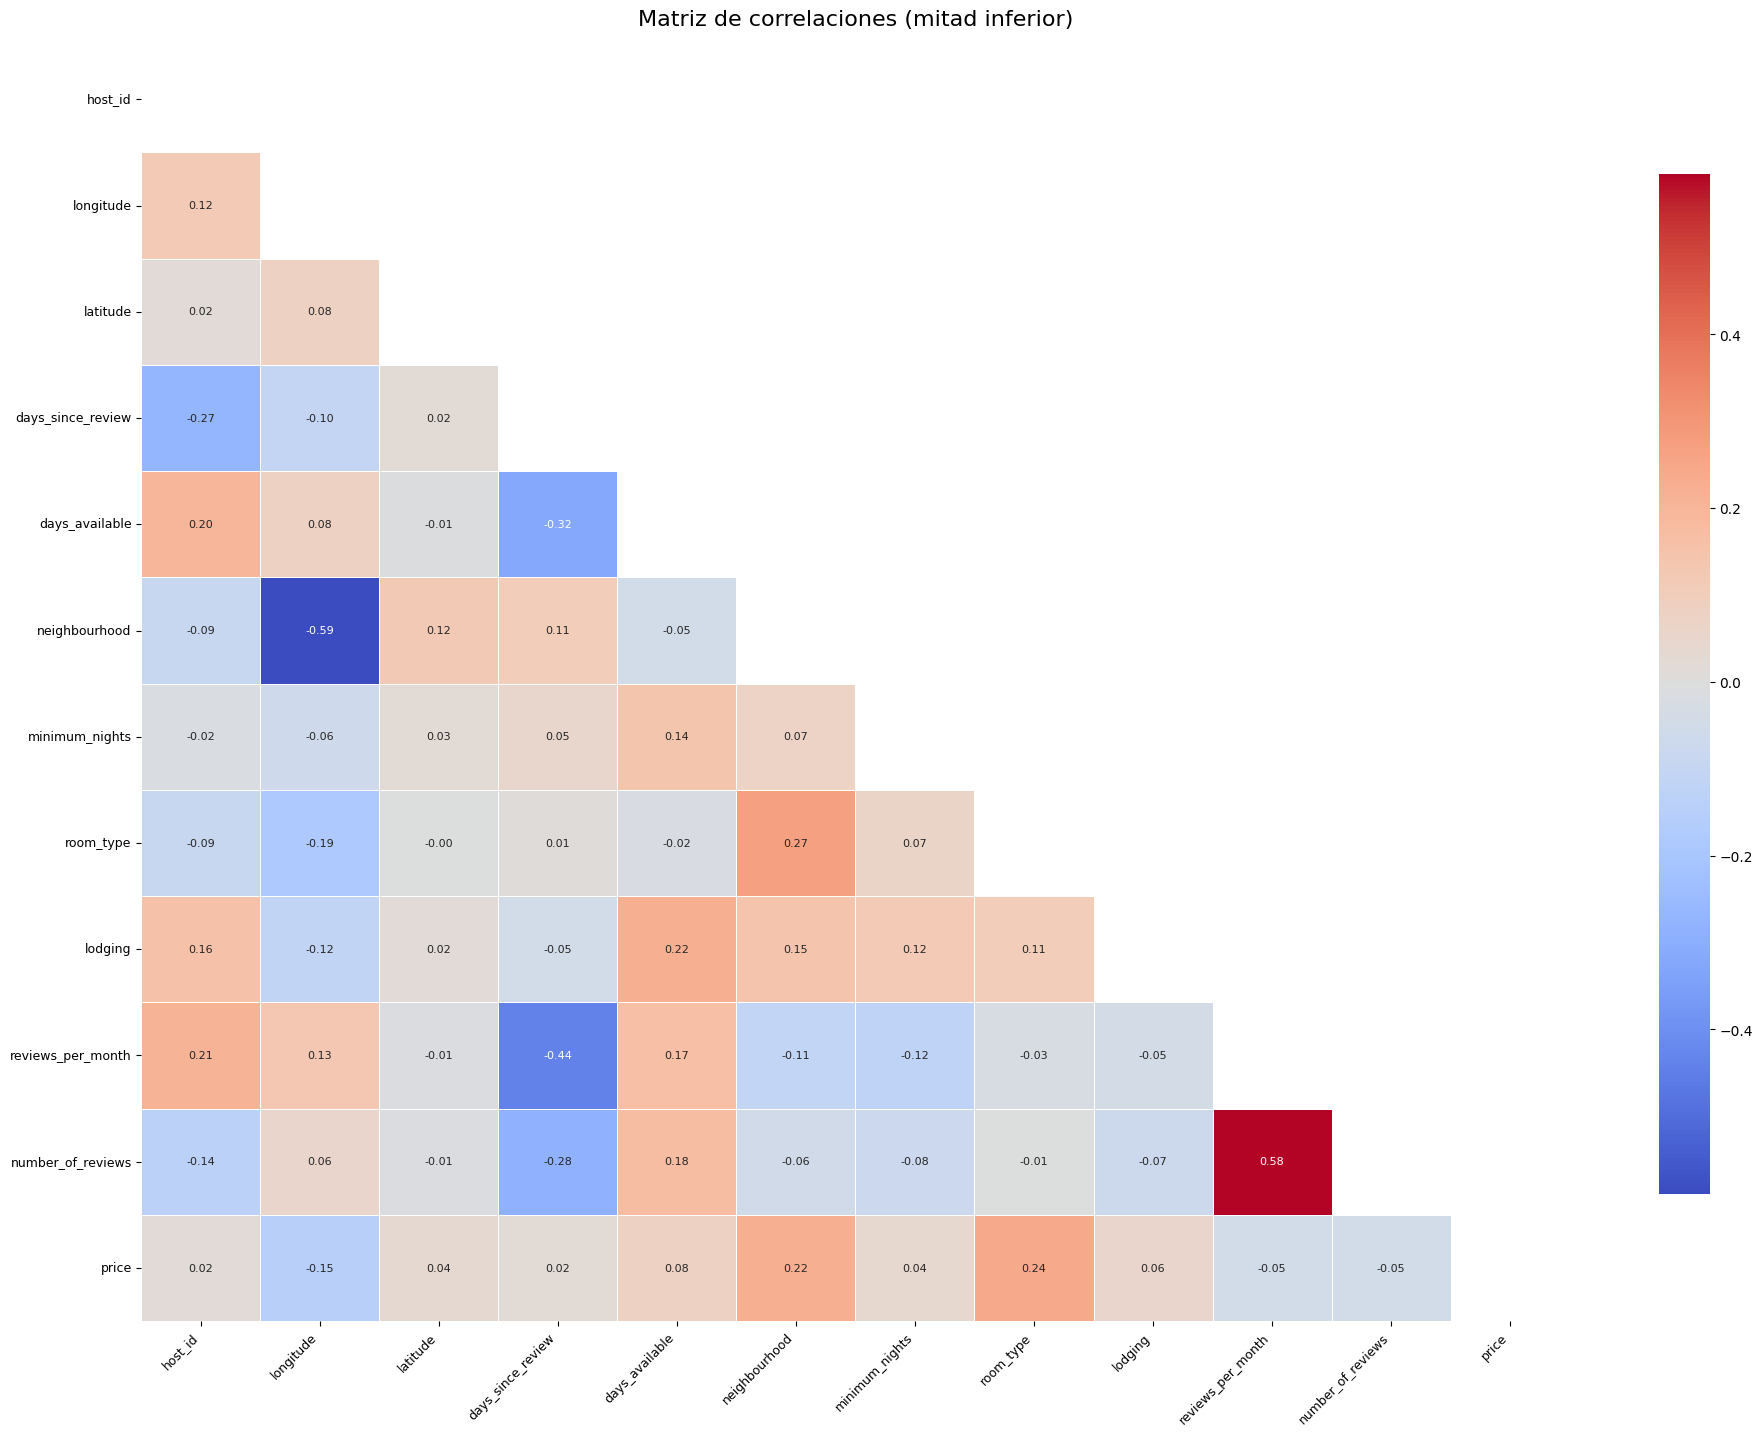

In [224]:
X_copy = X_train[features].copy()
X_copy['price'] = y_train
corr = X_copy.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20, 15))
sns.heatmap(
    corr, mask=mask, cmap='coolwarm',
    annot=True, fmt=".2f", linewidths=.5,
    cbar_kws={"shrink": .8},
    annot_kws={"size": 8}
)
plt.title("Matriz de correlaciones (mitad inferior)", fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout(pad=3.0)
plt.show()

En este caso, las variables que esta correlacionadas y que pueden presentar riesgo de colinealidad son:

Neighbourhood con Longitude(Latitude)

Number_of_reviews con reviews_per_month

## 2.4. Cross_validation

In [225]:
X_train

,host_id,host_prof,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,lodging,days_available,days_since_review
id,,,,,,,,,,,,,
25674366,9038810,0,4,158,40.72,-73.96,3,3,11,0.87,1,1,55.00
19100971,81745867,0,5,86,40.85,-73.94,2,2,2,0.16,1,0,380.00
24209867,1218837,1,4,121,40.69,-73.96,2,2,0,0.00,2,0,NaN
22451798,4126686,0,4,121,40.68,-73.93,3,3,87,4.91,1,267,5.00
5344850,27698133,0,2,70,40.75,-73.90,2,5,13,0.25,1,0,204.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754339,20261309,0,5,86,40.85,-73.94,1,1,0,0.00,1,0,NaN
34383329,53254710,0,5,206,40.74,-74.00,2,2,4,1.90,1,76,10.00
30109697,1385157,1,5,196,40.78,-73.97,3,30,1,0.34,5,261,89.00


In [226]:
# Versión 1: todas las características
cv_results1 = cross_val_score(RandomForestRegressor(random_state=42,n_jobs=-1), X_train[features], y_train, cv=4, scoring='neg_mean_absolute_error')

In [227]:
cv_results1.mean()

np.float64(-67.94577052868391)

In [228]:
# Versión 2: todas las características
cv_results2 = cross_val_score(RandomForestRegressor(random_state=42,n_jobs=-1), X_train[features].drop(['neighbourhood','number_of_reviews'],axis=1), y_train, cv=3, scoring='neg_mean_absolute_percentage_error')

In [229]:
cv_results2.mean()

np.float64(-91589637986685.19)

## Relacioón 1

## Relación 2

<Axes: ylabel='price'>

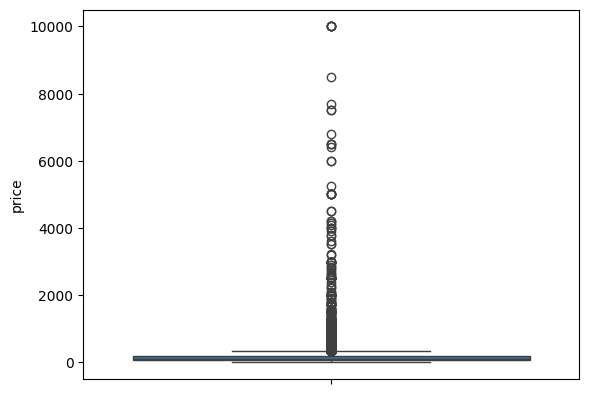

In [230]:
sns.boxplot(y_train)

## Ajustamos la base de datos para desechar los outliers

[]

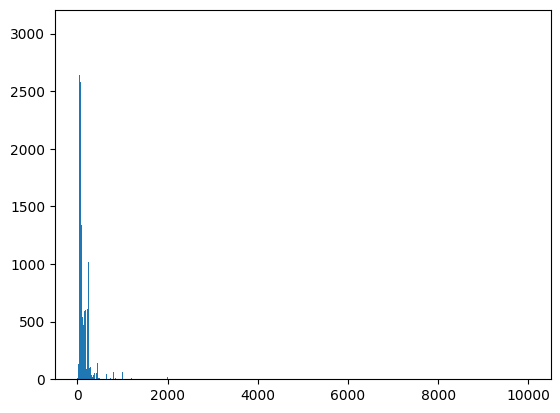

In [231]:
plt.hist(y_train, bins="auto") #[y_train<y_train.quantile(0.99)]
plt.plot()

In [232]:
y_train.describe()

count   39116.00
mean      153.75
std       247.04
min         0.00
25%        69.00
50%       107.00
75%       175.25
max     10000.00
Name: price, dtype: float64

In [233]:
df=df[(df["price"]>10)&(df['price'] <= 500)]
X = df.drop('price',axis=1)
y = df['price']

In [234]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42) #random_state establece una semilla para que la division aleatoria sea la misma

In [235]:
# Versión 1: todas las características
cv_results1 = cross_val_score(RandomForestRegressor(random_state=42,n_jobs=-1), X_train[features], y_train, cv=4, scoring='neg_mean_absolute_percentage_error')

In [236]:
cv_results1.mean()

np.float64(-0.34022724450553904)

## Guardar el nuevo dataset filtrado